In [1]:
## Использовал датасет который было необходимо обработать в Проекте по питону.



from __future__ import (absolute_import, division,
                        print_function, unicode_literals)

import random
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew
import seaborn as sns
import seaborn as seaborn
import matplotlib.pyplot as plt
# Python 2 and 3 compatibility
# pip install future


# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'png' 
from pylab import rcParams
rcParams['figure.figsize'] = 12,6 #6,3


from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

Populating the interactive namespace from numpy and matplotlib


In [2]:
data=pd.read_csv('HR.csv', sep=',')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# 2 Основные характеристики переменных

data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


(array([918., 203., 214., 210., 194.,  94., 108., 145., 224., 605., 535.,
        638., 286., 625., 560., 576., 594., 605., 614., 548., 606., 729.,
        727., 659., 722., 632., 644., 591., 551., 642.]),
 array([0.09      , 0.12033333, 0.15066667, 0.181     , 0.21133333,
        0.24166667, 0.272     , 0.30233333, 0.33266667, 0.363     ,
        0.39333333, 0.42366667, 0.454     , 0.48433333, 0.51466667,
        0.545     , 0.57533333, 0.60566667, 0.636     , 0.66633333,
        0.69666667, 0.727     , 0.75733333, 0.78766667, 0.818     ,
        0.84833333, 0.87866667, 0.909     , 0.93933333, 0.96966667,
        1.        ]),
 <a list of 30 Patch objects>)

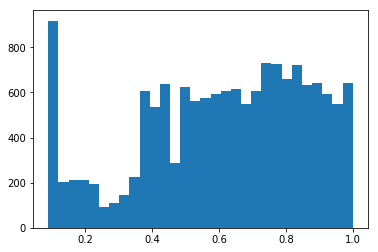

In [6]:
#n=np.arange(0,1)
plt.hist(data['satisfaction_level'],30)

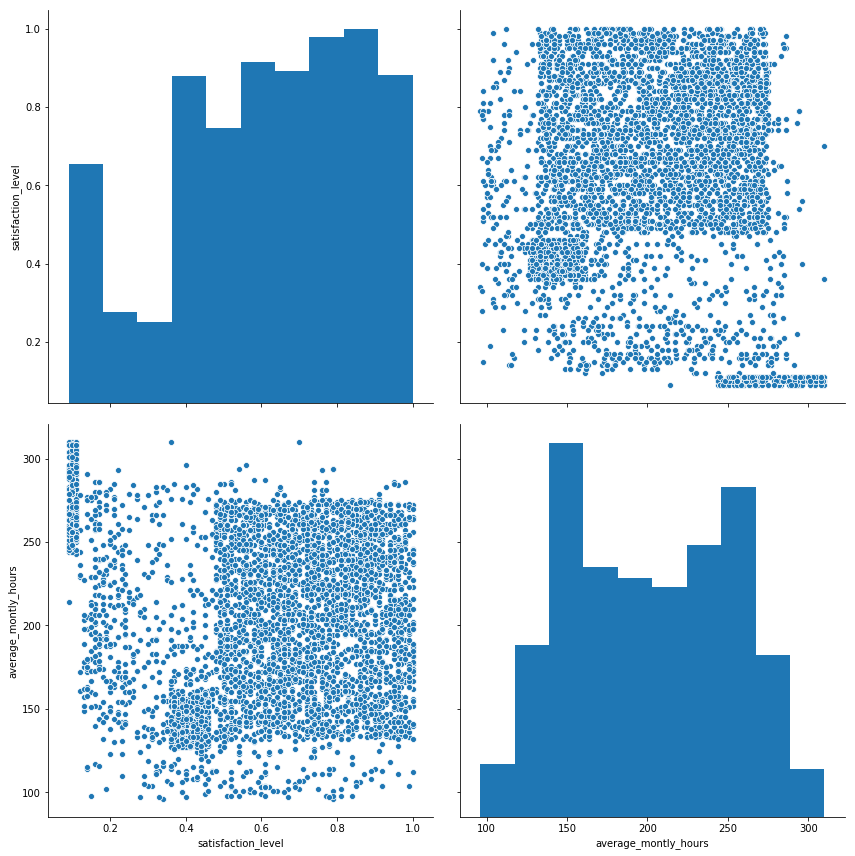

In [7]:
#4  визуализация взаимосвязи между переменными

## Тут я попробывал рисовать sample данных а не сами датасеты

seaborn.pairplot(data.sample(5000), vars=['satisfaction_level', 'average_montly_hours'],
                 kind='scatter',size = 6)  

# из этого графика ничего не понятно.

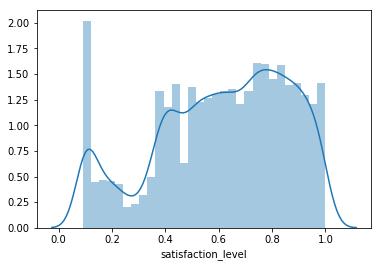

In [8]:
%config InlineBackend.figure_format = 'png' 
#sns.distplot(data.time_spend_company);
sns.distplot(data.satisfaction_level);

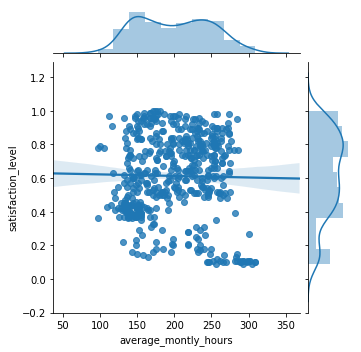

In [9]:
sns.jointplot(x='average_montly_hours', y='satisfaction_level', 
              data=data.sample(500), kind='reg',size = 5);

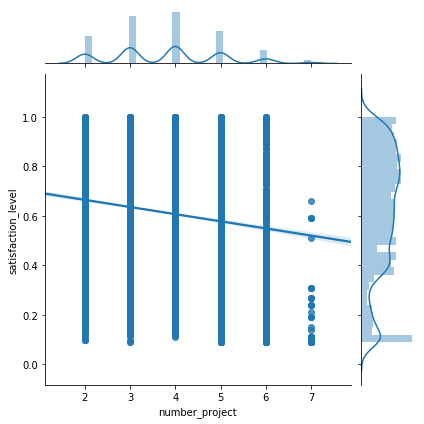

In [10]:
sns.jointplot(x='number_project', y='satisfaction_level', 
              data=data, kind='reg');

# Тут видно, что есть обратная зависимость между количеством проектов и уровнем удовлетворенности.

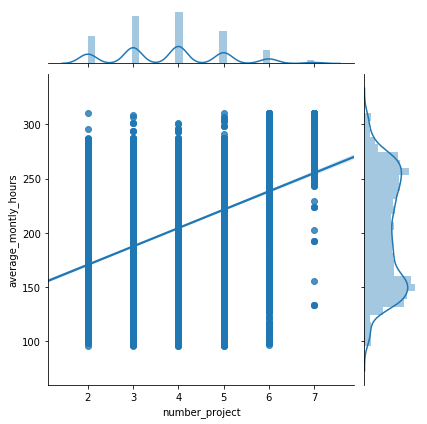

In [11]:
sns.jointplot(x='number_project', y='average_montly_hours', 
              data=data, kind='reg');

# Из этого графика видно что есть прямая зависимость между количеством проектов и количеством рабочих часов

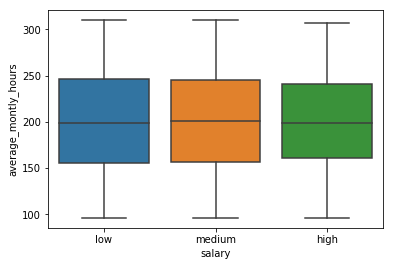

In [12]:
sns.boxplot(x="salary", y="average_montly_hours", 
            data= data)

# Из этого графика видно, что люди с разными зарплатами работают вцелом одинаково

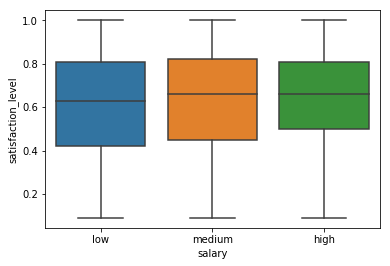

In [13]:
sns.boxplot(x="salary", y="satisfaction_level", 
            data= data)
# Тут видно, что люди с низкой ЗП менее удовлетворены работой

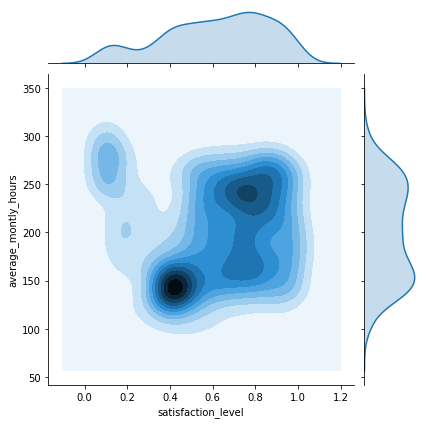

In [14]:
## Визуализация зависимости между переменными, Samples данных
# из графика видна зависимость

sns.jointplot(x='satisfaction_level', y='average_montly_hours', 
              data=data.sample(1000), kind='kde');


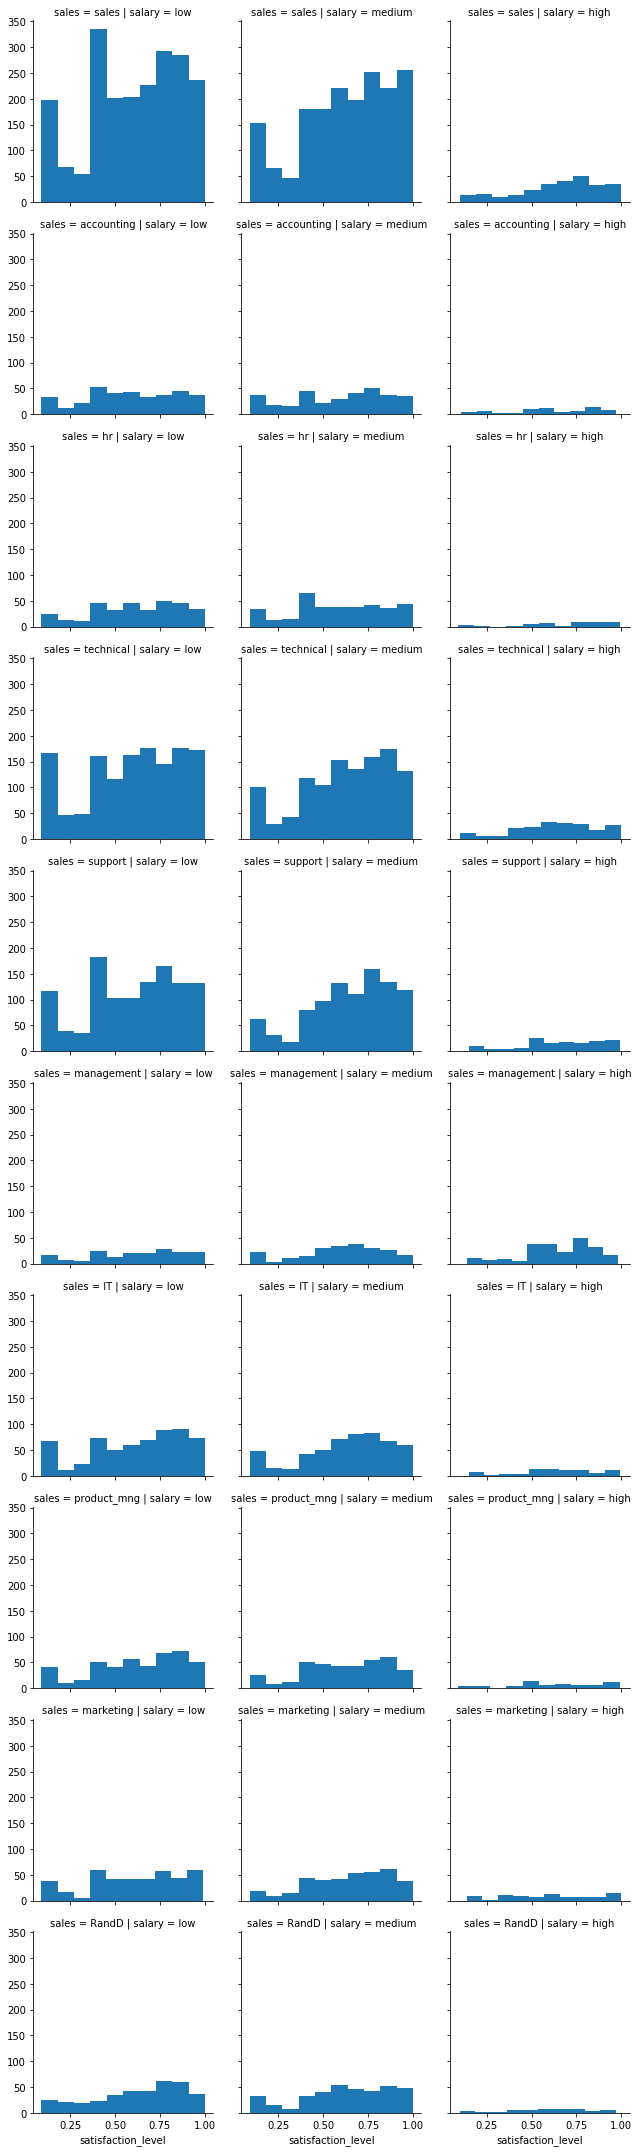

In [15]:
# Разбивка распределения уровня удовлетворенности по facet sales(Departament) и уровень дохода
# Facet на мой взгляд удобно смотреть

g = sns.FacetGrid(data, col="salary", row = "sales")
g = g.map(plt.hist, "satisfaction_level")

In [16]:
# Аггрегация данных в таблицы
# Тиблицы 

In [17]:
Dep_left_count_df = data.groupby(['sales','salary'])[['left']].sum()
Dep_count_df = data.groupby(['sales','salary'])[['salary']].count()
Dep_avg_sat_df = data.groupby(['sales','salary'])['satisfaction_level'].agg(['mean'])
Dep_df = Dep_left_count_df.join(Dep_count_df)
Dep_df = Dep_df.join(Dep_avg_sat_df)
Dep_df

left  salary      mean
sales       salary                        
IT          high       4      83  0.638193
            low      172     609  0.610099
            medium    97     535  0.624187
RandD       high       4      51  0.586667
            low       55     364  0.623929
            medium    62     372  0.620349
accounting  high       5      74  0.614054
            low       99     358  0.574162
            medium   100     335  0.583642
hr          high       6      45  0.673111
            low       92     335  0.608657
            medium   117     359  0.580306
management  high       1     225  0.653333
            low       59     180  0.610722
            medium    31     225  0.597867
marketing   high       9      80  0.605250
            low      126     402  0.602910
            medium    68     376  0.638218
product_mng high       6      68  0.614118
            low      105     451  0.620909
            medium    87     383  0.619112
sales       high      14     269  0.648959
            low      697    2099  0.600838
            medium   303    1772  0.625327
support     high       8     141  0.655035
            low      389    1146  0.591710
            medium   158     942  0.645149
technical   high      25     201  0.625970
            low      378    1372  0.594322
            medium   294    1147  0.620968

In [18]:
Dep_left_count_df = data.groupby(['sales','salary'])[['left']].sum()
Dep_count_df = data.groupby(['sales','salary'])[['salary']].count()
Dep_avg_sat_df = data.groupby(['sales','salary'])['satisfaction_level'].agg(['mean'])
Dep_df = Dep_left_count_df.join(Dep_count_df)
Dep_df = Dep_df.join(Dep_avg_sat_df)

Dep_df.columns = ['Sum_left', 'Sum_by_dep','Average_satisfaction']
Dep_df.sort_values('Sum_by_dep', inplace=False)
#Dep_df = Dep_df.apply(lambda x: 100*x/Dep_df.sum(), axis = 1)
Dep_df['Left_prcnt'] = Dep_df.Sum_left/ Dep_df.Sum_by_dep
Dep_df.head()
Dep_df = Dep_df.reset_index()
Dep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
sales                   30 non-null object
salary                  30 non-null object
Sum_left                30 non-null int64
Sum_by_dep              30 non-null int64
Average_satisfaction    30 non-null float64
Left_prcnt              30 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.5+ KB


In [19]:
Dep_df_pivot = Dep_df.pivot_table (index='sales', 
                        columns='salary', 
                        values='Left_prcnt', 
                        aggfunc=sum).fillna(0).applymap(float)
Dep_df_pivot = Dep_df_pivot.reset_index()
Dep_df_pivot

salary,sales,high,low,medium
0,IT,0.048193,0.282430,0.181308
1,RandD,0.078431,0.151099,0.166667
2,accounting,0.067568,0.276536,0.298507
3,hr,0.133333,0.274627,0.325905
4,management,0.004444,0.327778,0.137778
5,marketing,0.112500,0.313433,0.180851
6,product_mng,0.088235,0.232816,0.227154
7,sales,0.052045,0.332063,0.170993
8,support,0.056738,0.339442,0.167728
9,technical,0.124378,0.275510,0.256321


In [ ]:
# интерактивный бар из вашего примера

trace0 = go.Bar(
    x=Dep_df_pivot.sales,
    y=Dep_df_pivot.high,
    name='salary_hign',
    orientation = 'v'
)


trace1 = go.Bar(
    x=Dep_df_pivot.sales,
    y=Dep_df_pivot.medium,
    name='salary_medium',
    orientation = 'v'
)

trace2 = go.Bar(
    x=Dep_df_pivot.sales,
    y=Dep_df_pivot.low,
    name='salary_low',
    orientation = 'v'
)



data3 = [trace0,trace1,trace2]
layout = {'title': 'Текучка относительная зарплаты по департаментам'}

fig = go.Figure(data=data3, layout=layout)

iplot(fig, show_link=False)


In [ ]:
#  корреляционная матрица переменных
corr = data.corr()
corr

In [20]:
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

NameError: name 'corr' is not defined

In [ ]:
# Боксплот удовлетворенности сотрудников по департаментам

data.sales.unique()

In [224]:
data4 = []

for genre in data.sales.unique():
    data4.append(
        go.Box(y=data[data.sales==genre].satisfaction_level, 
               name=genre)
    )
iplot(data4, show_link = False)

In [225]:
## использовал из любопытства еще и  GGPLOT ,
## из-за facet, но как я понял они и в seaborn есть (сделал выше)


# using ggplot 
import pandas as pd
from pandas import Timestamp
#import ggplot
from ggplot import *

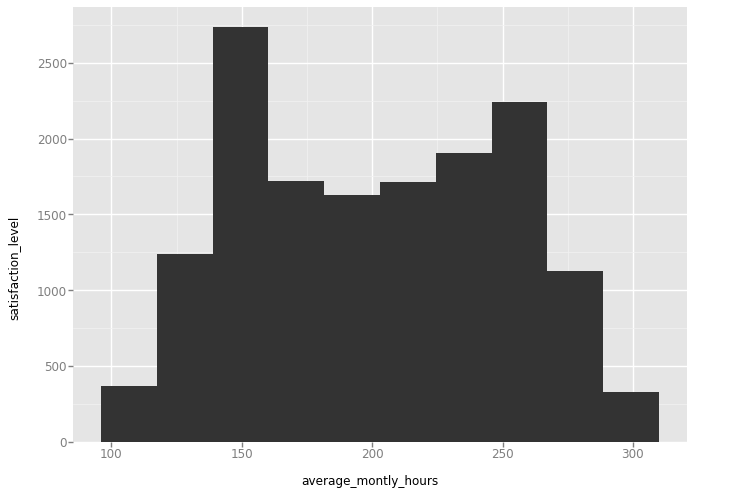

<ggplot: (-9223371859654715027)>

In [226]:
ggplot(aes(x="average_montly_hours", y="satisfaction_level"), data) + geom_histogram()

In [227]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


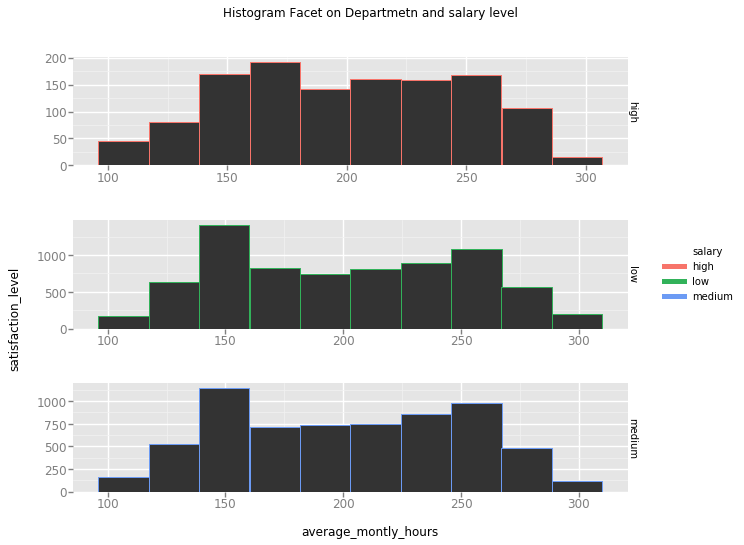

<ggplot: (177205089014)>

In [228]:
ggplot(aes(x='average_montly_hours', y='satisfaction_level',color = "salary"),  data=data) +\
    geom_histogram() +\
    xlab("average_montly_hours") +\
    ylab("satisfaction_level") +\
    ggtitle("Histogram Facet on Departmetn and salary level")+\
    facet_grid( "salary" ,scales='free')

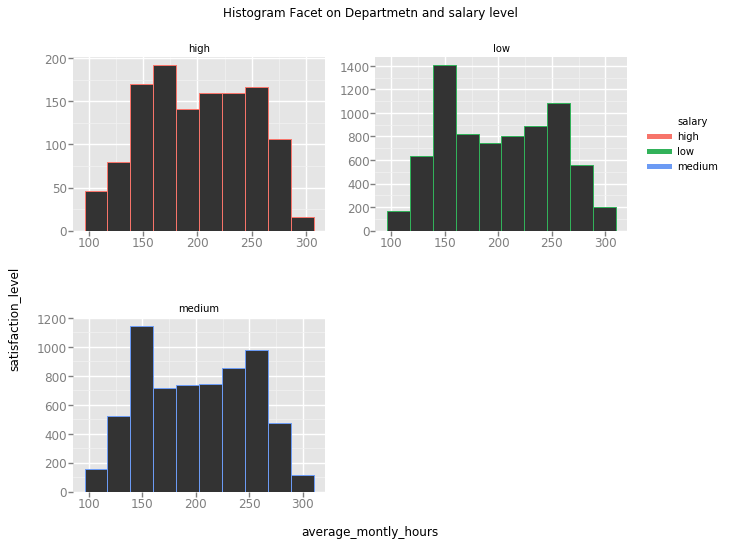

<ggplot: (177200180684)>

In [229]:
ggplot(aes(x='average_montly_hours', y='satisfaction_level',color = "salary"),  data=data) +\
    geom_histogram( position="identity") +\
    xlab("average_montly_hours") +\
    ylab("satisfaction_level") +\
    ggtitle("Histogram Facet on Departmetn and salary level")+\
    facet_wrap( "salary" ,scales='free')